# Exercise 2-2: Logistic Regression with Regularization

In this part of the exercise, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA).

## Load Data

In ex2data2.txt, the first two columns contains the X values and the third column contains the label y.

In [1]:
import numpy as np


data = np.loadtxt(open("ex2data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]

The plot_data() is the same as in the last exercise (Exercise 2-1: Logistic Regression).

In [2]:
import matplotlib.pyplot as plt


def plot_data(X, y):
    """
    Plots the data points X and y.

    Parameters
    ----------
    X : array-like, shape (n_samples, 2)
        Data on x axis.
    y : array-like, shape (n_samples,)
        Data on y axis.
    """
    pos = np.argwhere(y == 1)
    neg = np.argwhere(y == 0)

    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='y')

Plot the data:

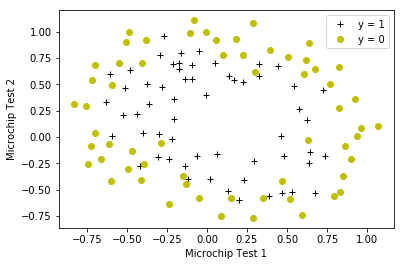

In [3]:
plt.figure()
plot_data(X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'], loc='upper right', numpoints=1)
plt.show()

## Part 1: Regularized Logistic Regression

The map_feature() maps input features to polynomial ones.

In [5]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features. Inputs X1, X2 must be the same size.

    Parameters
    ----------
    X1 : ndarray, shape (n_samples,)
        Input feature.
    X2 : ndarray, shape (n_samples,)
        Input feature.

    Returns
    -------
    Out : ndarray, shape (n_samples, 28)
        A new feature array with more features, comprising of X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    degree = 6
    Out = np.ones(len(X1))

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            tmp = np.power(X1, i - j) * np.power(X2, j)
            Out = np.vstack((Out, tmp))
    return Out.T

Add polynomial features:

In [6]:
# Note that map_feature also adds a column of ones for us, so the intercept term is handled
X = map_feature(X[:, 0], X[:, 1])

Initialize parameters as follows:

In [7]:
m, n = X.shape
# Initialize fitting parameters
initial_theta = np.zeros(n)
# Set regularization parameter lambda to 1
l = 1.0

The cost_function_reg() computes the cost and gradient for logistic regression with regularization.

In [8]:
def cost_function_reg(theta, X, y, l):
    """
    Compute cost and gradient for logistic regression with regularization.

    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    l : float
        Regularization parameter.

    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for regularized logistic regression w.r.t. the parameters.
    grad: ndarray, shape (n_features,)
        Partial derivatives of the cost w.r.t. each parameter in theta.
    """
    m, n = X.shape

    x_dot_theta = X.dot(theta)
    mask = np.eye(len(theta))
    # Skip the theta[0, 0] parameter when performing regularization
    mask[0, 0] = 0

    J = 1.0 / m * (np.dot(-y.T, np.log(sigmoid(x_dot_theta))) - np.dot((1 - y).T, np.log(1 - sigmoid(x_dot_theta)))) \
        + 1.0 * l / (2 * m) * np.sum(np.power((mask.dot(theta)), 2))

    grad = 1.0 / m * np.dot((sigmoid(x_dot_theta) - y).T, X).T + 1.0 * l / m * (mask.dot(theta))

    return J, grad


def sigmoid(z):
    """
    Compute sigmoid function.

    Parameters
    ----------
    z : array-like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The sigmoid of each value of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g

Test cost_function_reg() on inital parameters:

In [10]:
cost, _ = cost_function_reg(initial_theta, X, y, l)
print('Cost at initial theta (zeros):', cost)

Cost at initial theta (zeros): 0.6931471805599454


## Part 2: Regularization and Accuracies

Train the model with fin_tnc():

In [13]:
import scipy.optimize as opt


theta, nfeval, rc = opt.fmin_tnc(func=cost_function_reg, x0=initial_theta, args=(X, y, l))

Now define the plot_decision_boundary()

In [14]:
def plot_decision_boundary(theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    """
    if X.shape[1] <= 3:
        plot_X = np.array([np.amin(X[:, 1]) - 2, np.amax(X[:, 1]) + 2])
        plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
        plt.plot(plot_X, plot_y)
    else:
        u = np.linspace(-1, 1.5, 50)
        # u.resize((len(u), 1))
        v = np.linspace(-1, 1.5, 50)
        # v.resize((len(v), 1))
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = map_feature(u[i:i+1], v[j:j+1]).dot(theta)
        z = z.T
        u, v = np.meshgrid(u, v)
        cs = plt.contour(u, v, z, levels=[0])
        fmt = {}
        strs = ['Decision boundary']
        for l, s in zip(cs.levels, strs):
            fmt[l] = s

        plt.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)

Plot the decision boundary:

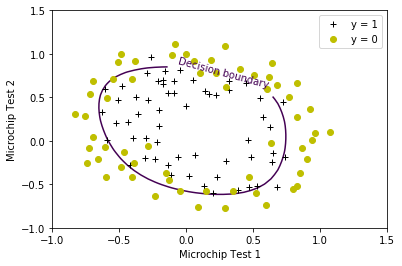

In [16]:
plt.figure()
plot_data(X[:, 1:], y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'], loc='upper right', numpoints=1)
plot_decision_boundary(theta, X, y)
plt.show()

The predict() predicts the input data with learned logistic regression parameters.

In [17]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters theta.

    Parameters
    ----------
    theta : ndarray, shape (n_features,)
        Linear regression parameter.
    X : ndarray, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    ndarray, shape (n_samples,)
        The predictions for X using a threshold at 0.5.
    """
    p = sigmoid(X.dot(theta)) >= 0.5
    return p.astype(int)

Compute accuracy on the training set:

In [18]:
p = predict(theta, X)
print('Train Accuracy:', np.mean(p == y) * 100)

Train Accuracy: 83.05084745762711
